### 导入依赖包

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


### 加载数据集

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### 查看训练集图片

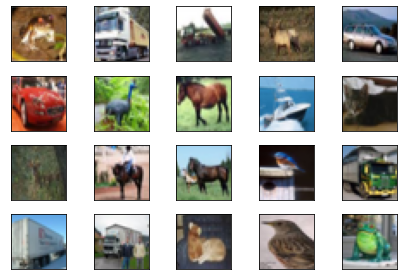

In [3]:
fig, ax = plt.subplots(nrows=4, ncols=5, sharex='all', sharey='all')
ax = ax.flatten()
for i in range(20):
    img = train_images[i]
    ax[i].imshow(img)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### 查看标签类别

In [4]:
labels = np.unique(train_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


### 对图片进行归一化

In [5]:
train_images, test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


### 搭建模型

In [6]:
model = tf.keras.models.Sequential([
    Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(10, activation='softmax')
])

### 指定优化器、损失函数、评价指标

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

### 训练模型

In [8]:
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.1636 - acc: 0.1792 - val_loss: 1.8696 - val_acc: 0.3045
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8480 - acc: 0.3158 - val_loss: 1.6941 - val_acc: 0.3849
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6897 - acc: 0.3837 - val_loss: 1.5897 - val_acc: 0.4275
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5677 - acc: 0.4330 - val_loss: 1.4668 - val_acc: 0.4658
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4769 - acc: 0.4680 - val_loss: 1.4604 - val_acc: 0.4709
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4172 - acc: 0.4878 - val_loss: 1.3686 - val_acc: 0.5014
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3699 - acc: 0.5006 - val_loss: 1.3381 - val_acc: 0.5147
Epoch 8/10
1563/1563 [==========================

### 查看模型结构

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### 显示模型准确率的变化过程

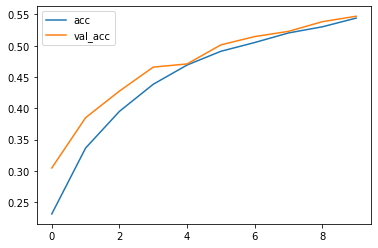

In [10]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

### 显示模型损失的变化过程

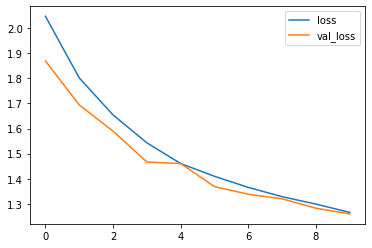

In [11]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()